**Задание**

Написать код, автоматизирующий построение карт Шухарта для процесса испытания углеродных волокон на разрыв. Исходные данные приведены в Excel-таблицах (20.xlsx, 30.xlsx, 40.xlsx).


> Необходимо отслеживать параметры:

1.   Fmax
2.   σ_M
3. dL при Fмакс

Для мониторинга процесса нужно использовать переменные — **групповое среднее и групповой размах**.

По данным необходимо построить три гистограммы: одна — для всех измерений, другая — для 20 групповых средних, третья — для 20 групповых размахов.

---

> Вариант: ***40_1***, параметр - ***dl_Fmax (%)***

In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [242]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [243]:
df = pd.read_excel('gdrive/My Drive/Colab Notebooks/40-1.xlsx').iloc[1: , :]

In [244]:
df.shape #26
df.head(3)

,Unnamed: 0,Eмод,Fmax,sM,dL при Fмакс
1,Образец3.1,208.799009,1970.029297,4432.565918,1.834823
2,Образец3.2,215.34115,1968.794067,4429.786652,1.780208
3,Образец3.3,209.135015,1892.970581,4259.183807,1.743159


In [245]:
columns = ['Sample', 'Emod', 'Fmax', 'σ_M', 'dL_Fmax']
df.columns = columns

In [246]:
def histograms(column_name, k):
  df['group'] = pd.cut(df.index, bins=k, labels=False)
  df_means = df.groupby('group')[column_name].mean()
  r = df.groupby('group')[column_name].agg(range = lambda x: x.max() - x.min())

  fig, axes = plt.subplots(1, 3, figsize=(15, 4))
  data_to_plot = [df[column_name], df_means, r]
  titles = ['Все измерения', f'{k} групповых средних', f'{k} групповых размахов']
  for i, data in enumerate(data_to_plot):
    ax = axes[i]

    ax.hist(data, bins = k,
             color = 'gray', edgecolor = 'black', alpha = 0.8)
    ax.set_title(f'Гистограмма распределения: {titles[i]}', size=9)
    ax.set_xlabel('Среднее значение', size=7)
    ax.set_ylabel('Частотность', size=7)

  plt.tight_layout()
  plt.show()

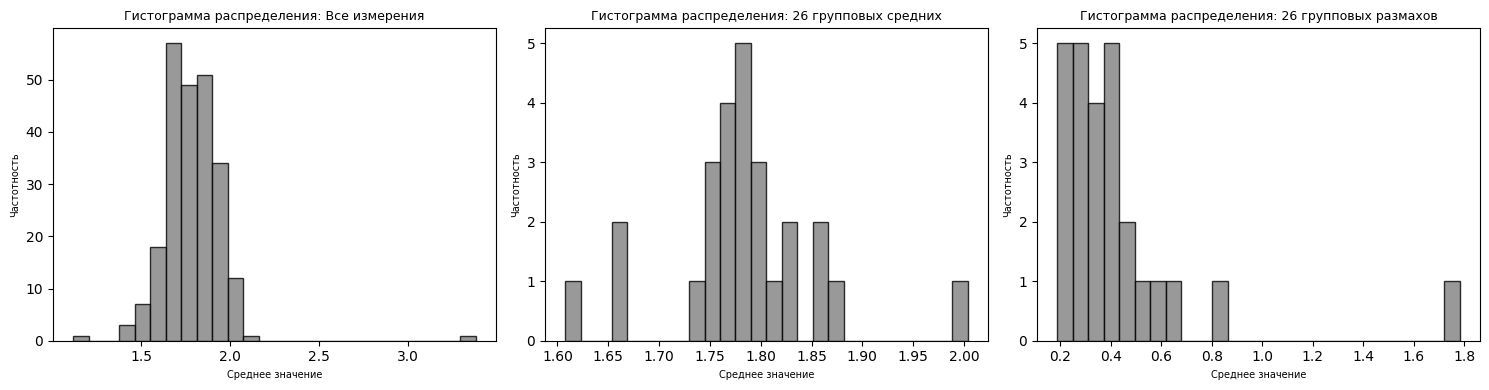

In [248]:
histograms('dL_Fmax', 26)

In [252]:
def shuhard_card_mean(column_name, k):

  df['group'] = pd.cut(df.index, bins=k, labels=False)
  df_means = df.groupby('group')[column_name].mean()
  r = df.groupby('group')[column_name].agg(range = lambda x: x.max() - x.min())
  n = int(len(df[column_name]) / k)
  A2 = [1.880, 1.023, 0.729, 0.577, 0.483, 0.419, 0.373, 0.337, 0.308]

  x = np.arange(1, k+1)
  UCLx = [df_means.mean() + A2[n-2]*r.mean()]*k
  CLx = [df_means.mean()] * k
  LCLx = [df_means.mean() - A2[n-2]*r.mean()]*k

  plt.figure(figsize=(22,6))
  plt.plot(x, CLx, label = 'Среднее значение', color='green')
  plt.plot(x, UCLx, label ='Верхняя граница', linestyle='--', color='red')
  plt.plot(x, df_means,label ='Средние групп', color='grey')
  plt.scatter(x, df_means, color='black', s=30)
  plt.plot(x, LCLx, label = 'Нижняя граница', linestyle='--', color = 'red')

  plt.title(f'Контрольная карта среднего {column_name}')
  plt.grid(alpha=0.5)
  plt.legend(fontsize=12)
  plt.show()

In [253]:
def shuhard_card_range(column_name, k):

  df['group'] = pd.cut(df.index, bins=k, labels=False)
  r = df.groupby('group')[column_name].agg(range=lambda x: x.max() - x.min())
  n = int(len(df[column_name]) / k)
  D3 = [0, 0, 0, 0, 0, 0.076, 0.136, 0.184, 0.223]
  D4 = [3.268, 2.574, 2.282, 2.114, 2.004, 1.924, 1.864, 1.816, 1.777]

  x = np.arange(1, k+1)
  UCLr = [D4[n-2]*r.mean()] * k
  CLr = [r.mean()] * k
  LCLr = [D3[n-2]*r.mean()] * k

  plt.figure(figsize=(22,6))
  plt.plot(x, CLr, label = 'Среднее значение', color='green')
  plt.plot(x, UCLr, label ='Верхняя граница', linestyle='--', color='red')
  plt.plot(x, r, label ='Размах групп', color='grey')
  plt.scatter(x, r, color='black', s=30)
  plt.plot(x, LCLr, label = 'Нижняя граница', linestyle='--', color = 'red')

  plt.title(f'Контрольная карта размаха {column_name}')
  plt.grid(alpha=0.5)
  plt.legend(fontsize=12)
  plt.show()

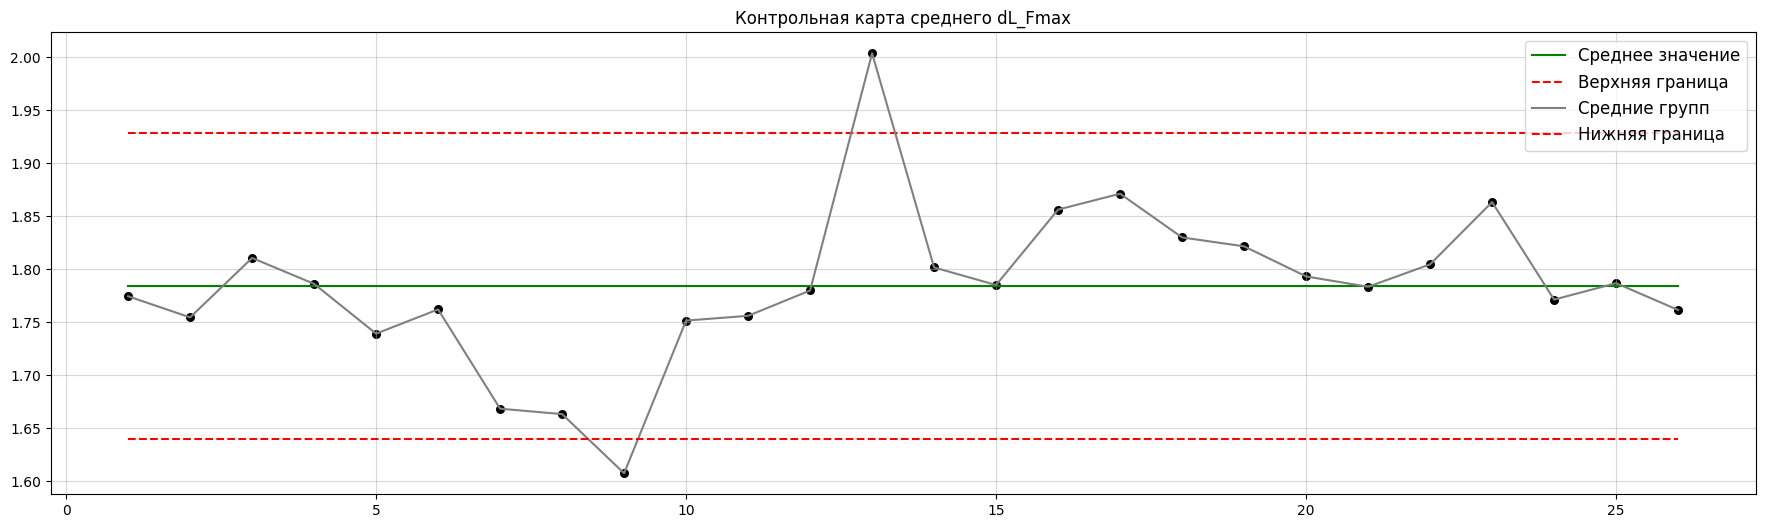

In [254]:
shuhard_card_mean('dL_Fmax', 26)

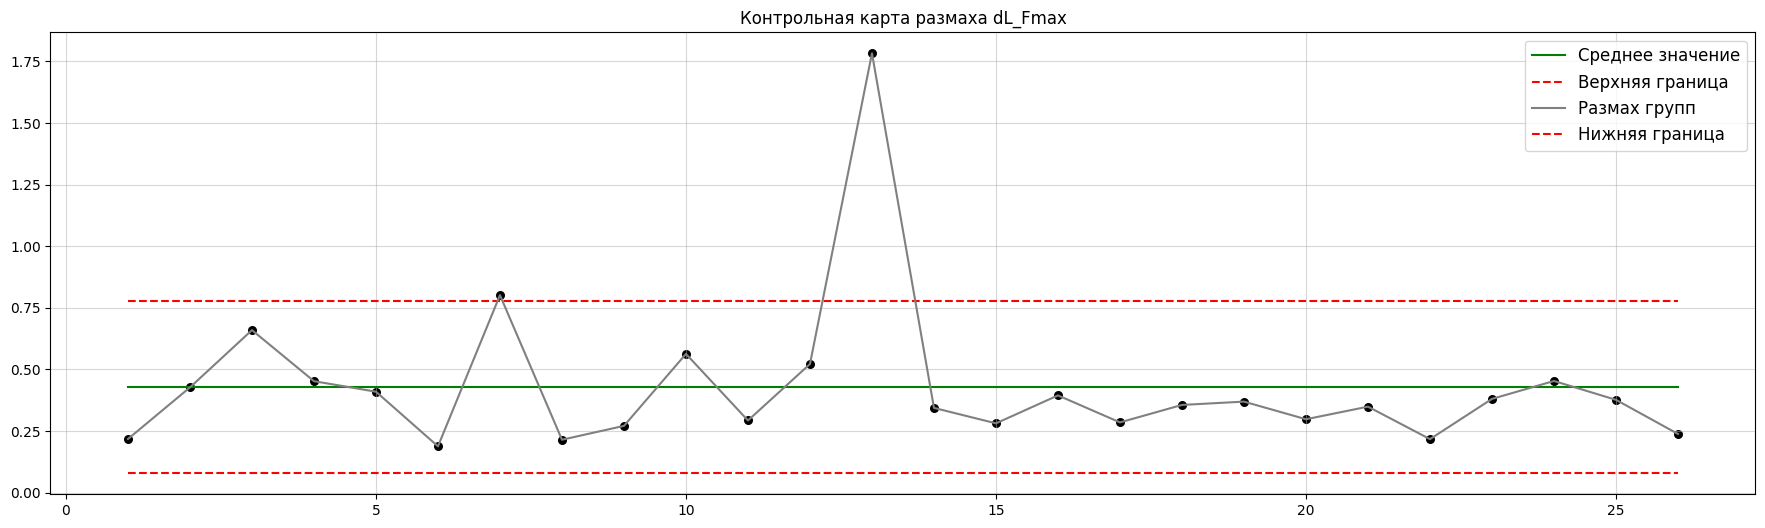

In [255]:
shuhard_card_range('dL_Fmax', 26)